In [1]:
import chess

In [3]:
board = chess.Board()
print(board)

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


In [4]:
# pgn_list = ["1. Ng1f3 d7d6", "2. d2d4 Nf6", "3. Nbd2 g6"]
pgn_list = ["1. c2c3 c7c5"]

board = chess.Board()
print(board)
print()

for pgn in pgn_list:
    
    num, move1, move2 = pgn.split()
    print(move1)

    print(f"num: {num}")

    board.push_san(move1)
    print(board)
    print()

    board.push_san(move2)
    print(board)
    print()

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R

c2c3
num: 1.
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . P . . . . .
P P . P P P P P
R N B Q K B N R

r n b q k b n r
p p . p p p p p
. . . . . . . .
. . p . . . . .
. . . . . . . .
. . P . . . . .
P P . P P P P P
R N B Q K B N R



In [1]:
BLACK = "black"
WHITE = "white"

In [2]:
import chess
import chess.pgn

def generate_pgn(moves, ori):

    # initialize empty board 
    board = chess.Board()

    if ori is not None:
        board.clear()

        # place each piece
        for color, piece, alpha, num in ori:
            if color == BLACK:
                piece = piece.lower()
            elif color == WHITE:
                piece = piece.upper()

            position = alpha + str(num)
            square = chess.parse_square(position)
            board.set_piece_at(square, chess.Piece.from_symbol(piece))

    # create game
    game = chess.pgn.Game()
    node = game
    node.headers["FEN"] = board.fen()

    # iterate through UCI and keep track of board state
    board_states = list()
    board_states.append(board)
    for move in moves:
        try:
            node = node.add_variation(board.parse_uci(move))
            board.push_uci(move)
            board_states.append(board)
        except ValueError:
            print(f"Move {move} is invalid")
    
    pgn = str(game).split("\n")[-1]
    return pgn, board_states

moves = ["c2c3", "c6c5"]
ori = [("white","P","c","2"),("black","Q","c","6")]
# moves = uci_moves = [
#     "g1f3",
#     "d7d6",
#     "d2d4",
#     "g8f6",
#     "b1d2",
#     "g7g6",
#     "e2e4",
#     "f8g7",
#     "f1d3",
#     "e8g8",
#     "e1g1",
#     "b8c6",
#     "c2c3",
#     "e7e5",
#     "h2h3",
#     "f6h5",
#     "d4e5",
#     "h5f4"]

pgn, board_states = generate_pgn(moves,ori)
pgn


NameError: name 'BLACK' is not defined

In [86]:
pgn_moves = [
    "Nf3", "d6", "d4", "Nf6", "Nbd2", "g6", "e4", "Bg7",
    "Bd3", "0-0", "0-0", "Nc6", "c3", "e5", "h3", "Nh5",
    "dxe5", "Nf4", "Bb5", "Nxe5", "Nxe5", "Qg5"
]
def group_into_pairs(lst):
    # Group consecutive elements in pairs, leave the last element if it's odd
    return [lst[i] + " " + lst[i + 1] if i + 1 < len(lst) else lst[i] for i in range(0, len(lst), 2)]

pgn = [f"{i+1}. {elm}" for i, elm in enumerate(group_into_pairs(pgn_moves))]
" ".join(pgn)

'1. Nf3 d6 2. d4 Nf6 3. Nbd2 g6 4. e4 Bg7 5. Bd3 0-0 6. 0-0 Nc6 7. c3 e5 8. h3 Nh5 9. dxe5 Nf4 10. Bb5 Nxe5 11. Nxe5 Qg5'

In [ ]:
# moves = uci_moves = [
#     "g1f3",
#     "d7d6",
#     "d2d4",
#     "g8f6",
#     "b1d2",
#     "g7g6",
#     "e2e4",
#     "f8g7",
#     "f1d3",
#     "e8g8",
#     "e1g1",
#     "b8c6",
#     "c2c3",
#     "e7e5",
#     "h2h3",
#     "f6h5",
#     "d4e5",
#     "h5f4"]

Processing 0th frame


W0000 00:00:1733754466.530872   11810 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733754466.550749   11810 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


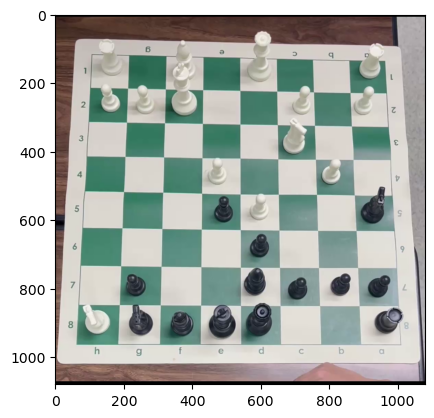

Processing 100th frame
HANDS!


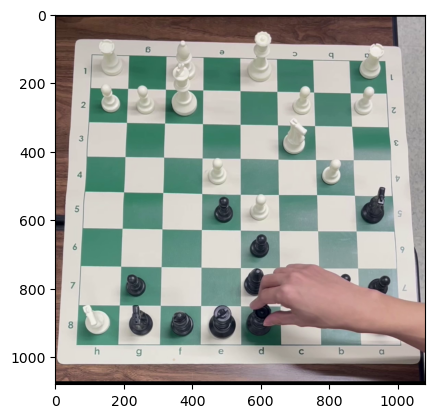

Processing 200th frame
HANDS!


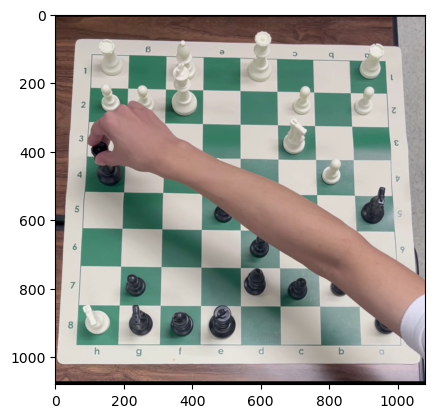

Processing 300th frame
HANDS!


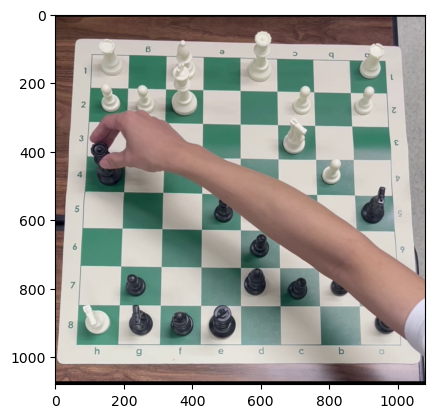

Processing 400th frame


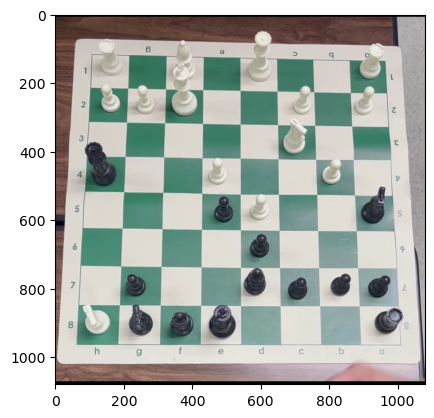

Processing 500th frame


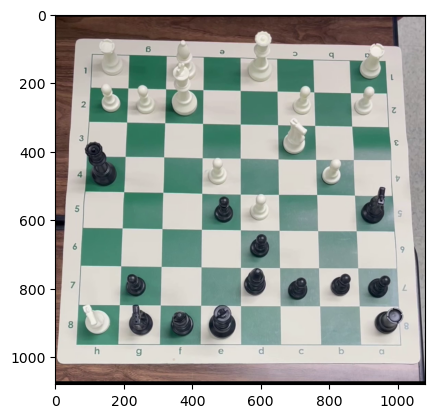

Processing 600th frame


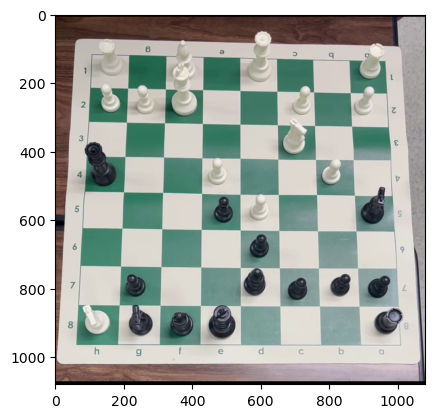

Processing 700th frame


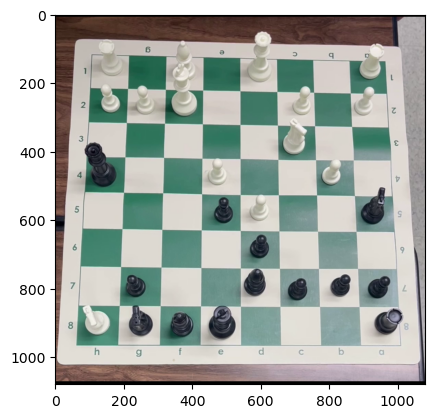

Processing 800th frame


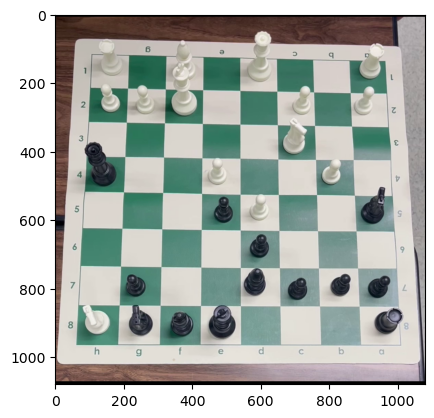

Processing 900th frame


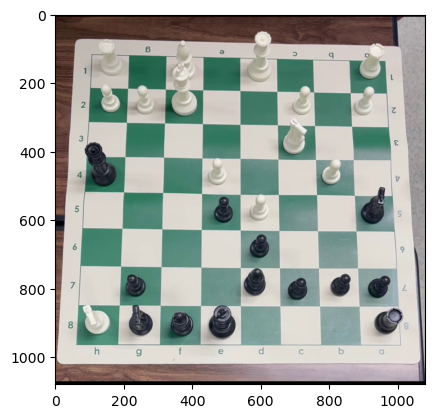

Processing 1000th frame


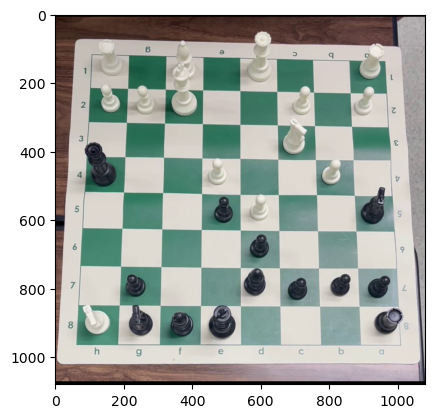

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp


#  set up
# Initialize MediaPipe Hands detector
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(min_detection_confidence=0.2, min_tracking_confidence=0.5)

def frame_generator(video_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Could not open video file.")
        return

    while True:
        ret, frame = cap.read()
        if not ret:
            break  # End of video
        yield frame  # Yield frame to the caller

    cap.release()

# Function to check if hands are detected in a frame
def hands_detected(frame):
    # Convert the frame to RGB as MediaPipe uses RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Process the frame and get the result
    results = hands.process(rgb_frame)
    
    # If hands are detected, results.multi_hand_landmarks will not be None
    return results.multi_hand_landmarks is not None

# Usage example:
video_path = '2_move_student.mp4'
for i,frame in enumerate(frame_generator(video_path)):
    # Process each frame (it's a NumPy array)
    # print("Processing a new frame")
    # Here you can process the frame (e.g., display, save, etc.)

    # print(frame.shape)
    h,w,_ = frame.shape
    delta = (h-w)//2
    frame = frame[delta:delta+w-1,:,:]


    if i%100 == 0:
        print(f"Processing {i}th frame")
        if hands_detected(frame):
            print("HANDS!")
        plt.imshow(frame[:,:,::-1])
        plt.show()

    if i > 1000:
        break


In [2]:
import cv2
import numpy as np

def stretch_image_to_corners(image, corners):
    """
    Stretches the input image so that the four given coordinates become the exact corners of the output image.
    
    Parameters:
        image (numpy.ndarray): The input image to be transformed.
        corners (list of tuple): A list of four tuples representing the new corners of the output image
                                 in the order [top-left, top-right, bottom-right, bottom-left].
    
    Returns:
        numpy.ndarray: The transformed image with the specified corners.
    """
    # Define the output image size based on the new corners
    # Map the new corners to a rectangular output image
    output_corners = np.array([
        [0, 0],                          # Top-left
        [corners[1][0] - corners[0][0], 0],  # Top-right
        [corners[2][0] - corners[0][0], corners[2][1] - corners[1][1]],  # Bottom-right
        [0, corners[3][1] - corners[0][1]]   # Bottom-left
    ], dtype="float32")

    # Convert the input corners to a NumPy array
    new_corners = np.array(corners, dtype="float32")

    # Compute the perspective transform matrix
    transform_matrix = cv2.getPerspectiveTransform(new_corners, output_corners)

    # Output image size based on output_corners dimensions
    output_width = int(output_corners[2][0])  # Bottom-right x-coordinate
    output_height = int(output_corners[2][1])  # Bottom-right y-coordinate

    # Apply the perspective transformation
    transformed_image = cv2.warpPerspective(image, transform_matrix, (output_width, output_height))

    return transformed_image


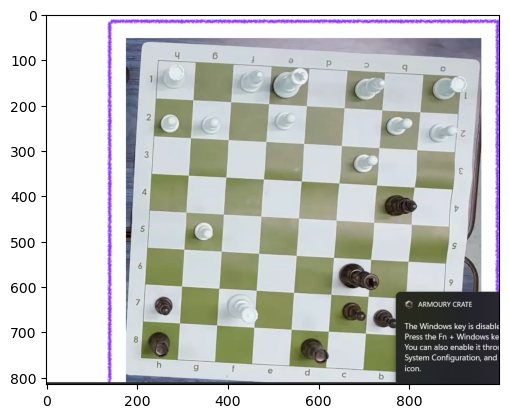

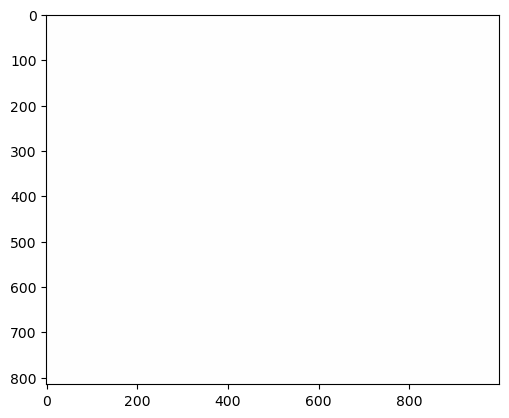

In [3]:
# Load an image
image = cv2.imread('Screenshot 2024-11-25 124535.png')

# Define the new corners
new_corners = [(200,100), (900,100), (200, 800), (850, 800)]

# Transform the image
transformed_image = stretch_image_to_corners(image, new_corners)

# Display the result
plt.imshow(image)
plt.show()
plt.imshow(transformed_image)
plt.show()

In [4]:
from collections import Counter

def summarize_states(lst, tolerance):
    print("Original list of states:", lst)
    
    # Step 1: Count occurrences of each exact state
    state_counts = Counter(tuple(sorted(state)) for state in lst)
    print("State counts:", state_counts)
    
    # Determine major states (those appearing >= tolerance times)
    major_states = {state for state, count in state_counts.items() if count >= tolerance}
    print("Major states:", major_states)
    
    # Filter list to include only major states
    filtered_lst = [state for state in lst if tuple(sorted(state)) in major_states]
    print("Filtered list:", filtered_lst)

    # Step 2: Summarize consecutive phases
    summarized_states = []
    for state in filtered_lst:
        if not summarized_states or summarized_states[-1] != state:
            summarized_states.append(state)
    print("Summarized states:", summarized_states)

    # Step 3: Identify differences between consecutive states
    differences = []
    for i in range(len(summarized_states) - 1):
        old_state = summarized_states[i]
        new_state = summarized_states[i + 1]
        removed = old_state - new_state
        added = new_state - old_state
        differences.append((removed.pop(), added.pop()))  # Single change assumption
    print("Differences:", differences)

    return differences

# Example usage
lst = [
    {(0, "a"), (2, "a"), (3, "a")}, {(0, "a"), (2, "a"), (3, "a")}, {(0, "a"), (2, "a"), (3, "a")}, {(0, "a"), (2, "a"), (4, "a")}, 
    {(0, "a"), (1, "a"), (3, "a")}, {(0, "a"), (1, "a"), (3, "a")}, {(0, "a"), (1, "a"), (3, "a")}, {(1, "a"), (2, "a"), (3, "a")}, 
    {(0, "a"), (1, "a"), (3, "a")}, {(0, "a"), (1, "a"), (3, "a")}, {(0, "a"), (1, "a"), (2, "a")}, {(0, "a"), (1, "a"), (2, "a")}
]

tolerance = 2

result = summarize_states(lst, tolerance)
print("Final result:", result)


Original list of states: [{(2, 'a'), (0, 'a'), (3, 'a')}, {(2, 'a'), (0, 'a'), (3, 'a')}, {(2, 'a'), (0, 'a'), (3, 'a')}, {(4, 'a'), (2, 'a'), (0, 'a')}, {(0, 'a'), (3, 'a'), (1, 'a')}, {(0, 'a'), (3, 'a'), (1, 'a')}, {(0, 'a'), (3, 'a'), (1, 'a')}, {(2, 'a'), (3, 'a'), (1, 'a')}, {(0, 'a'), (3, 'a'), (1, 'a')}, {(0, 'a'), (3, 'a'), (1, 'a')}, {(2, 'a'), (0, 'a'), (1, 'a')}, {(2, 'a'), (0, 'a'), (1, 'a')}]
State counts: Counter({((0, 'a'), (1, 'a'), (3, 'a')): 5, ((0, 'a'), (2, 'a'), (3, 'a')): 3, ((0, 'a'), (1, 'a'), (2, 'a')): 2, ((0, 'a'), (2, 'a'), (4, 'a')): 1, ((1, 'a'), (2, 'a'), (3, 'a')): 1})
Major states: {((0, 'a'), (2, 'a'), (3, 'a')), ((0, 'a'), (1, 'a'), (2, 'a')), ((0, 'a'), (1, 'a'), (3, 'a'))}
Filtered list: [{(2, 'a'), (0, 'a'), (3, 'a')}, {(2, 'a'), (0, 'a'), (3, 'a')}, {(2, 'a'), (0, 'a'), (3, 'a')}, {(0, 'a'), (3, 'a'), (1, 'a')}, {(0, 'a'), (3, 'a'), (1, 'a')}, {(0, 'a'), (3, 'a'), (1, 'a')}, {(0, 'a'), (3, 'a'), (1, 'a')}, {(0, 'a'), (3, 'a'), (1, 'a')}, {(2, 'a'

In [5]:
from collections import Counter

def summarize_states(lst, tolerance):
    print("Original list of states:", lst)
    
    # Step 1: Count occurrences of each exact state
    state_counts = Counter(frozenset(state) for state in lst)
    print("State counts:", state_counts)
    
    # Determine major states (those appearing >= tolerance times)
    major_states = {state for state, count in state_counts.items() if count >= tolerance}
    print("Major states:", major_states)
    
    # Filter list to include only major states
    filtered_lst = [state for state in lst if frozenset(state) in major_states]
    print("Filtered list:", filtered_lst)

    # Step 2: Summarize consecutive phases
    summarized_states = []
    for state in filtered_lst:
        if not summarized_states or summarized_states[-1] != state:
            summarized_states.append(state)
    print("Summarized states:", summarized_states)

    # Step 3: Identify differences between consecutive states
    differences = []
    for i in range(len(summarized_states) - 1):
        old_state = summarized_states[i]
        new_state = summarized_states[i + 1]
        
        disappeared = old_state - new_state
        appeared = new_state - old_state
        
        differences.append((disappeared, appeared))
    print("Differences:", differences)

    return differences

# Example usage
lst = [
    {(0, "a"), (2, "a"), (3, "a")}, {(0, "a"), (2, "a"), (3, "a")}, {(0, "a"), (2, "a"), (3, "a")},
    {(0, "a"), (2, "a"), (4, "a")}, {(0, "a"), (1, "a"), (3, "a")}, {(0, "a"), (1, "a"), (3, "a")},
    {(0, "a"), (1, "a"), (3, "a")}, {(1, "a"), (2, "a"), (3, "a")}, {(0, "a"), (7, "a"), (4, "a")},
    {(0, "a"), (7, "a"), (4, "a")}, {(0, "a"), (1, "a"), (2, "a")}, {(0, "a"), (1, "a"), (2, "a")}
]
tolerance = 2

result = summarize_states(lst, tolerance)
print("Final result:", result)


Original list of states: [{(2, 'a'), (0, 'a'), (3, 'a')}, {(2, 'a'), (0, 'a'), (3, 'a')}, {(2, 'a'), (0, 'a'), (3, 'a')}, {(4, 'a'), (2, 'a'), (0, 'a')}, {(0, 'a'), (3, 'a'), (1, 'a')}, {(0, 'a'), (3, 'a'), (1, 'a')}, {(0, 'a'), (3, 'a'), (1, 'a')}, {(2, 'a'), (3, 'a'), (1, 'a')}, {(0, 'a'), (7, 'a'), (4, 'a')}, {(0, 'a'), (7, 'a'), (4, 'a')}, {(2, 'a'), (0, 'a'), (1, 'a')}, {(2, 'a'), (0, 'a'), (1, 'a')}]
State counts: Counter({frozenset({(2, 'a'), (0, 'a'), (3, 'a')}): 3, frozenset({(0, 'a'), (3, 'a'), (1, 'a')}): 3, frozenset({(0, 'a'), (7, 'a'), (4, 'a')}): 2, frozenset({(2, 'a'), (0, 'a'), (1, 'a')}): 2, frozenset({(4, 'a'), (2, 'a'), (0, 'a')}): 1, frozenset({(2, 'a'), (3, 'a'), (1, 'a')}): 1})
Major states: {frozenset({(2, 'a'), (0, 'a'), (1, 'a')}), frozenset({(0, 'a'), (7, 'a'), (4, 'a')}), frozenset({(0, 'a'), (3, 'a'), (1, 'a')}), frozenset({(2, 'a'), (0, 'a'), (3, 'a')})}
Filtered list: [{(2, 'a'), (0, 'a'), (3, 'a')}, {(2, 'a'), (0, 'a'), (3, 'a')}, {(2, 'a'), (0, 'a'), (3

In [6]:
def pgn_from_differences(differences):
    """
    Convert the output of summarize_states into PGN format.

    Parameters:
        differences (list): List of differences as ({disappeared}, {appeared}).

    Returns:
        list: A list of PGN strings describing the moves.
    """
    pgn_moves = []

    for disappeared, appeared in differences:
        # Track processed pieces
        processed_disappeared = set()
        processed_appeared = set()

        # Match disappeared and appeared pieces
        for old_piece in disappeared:
            # Try to find a matching appeared piece with the same (color, class)
            match = next((new_piece for new_piece in appeared 
                          if old_piece[:2] == new_piece[:2]), None)
            if match:
                # Movement: piece moved to a new position
                old_pos = f"{old_piece[2]}{old_piece[3]}"
                new_pos = f"{match[2]}{match[3]}"
                pgn_moves.append(f"{old_piece[1][0].upper()}{old_pos}-{new_pos}")
                processed_disappeared.add(old_piece)
                processed_appeared.add(match)
            else:
                # Piece disappeared without a matching appearance (elimination or capture)
                old_pos = f"{old_piece[2]}{old_piece[3]}"
                pgn_moves.append(f"{old_piece[1][0].upper()}{old_pos}x")
                processed_disappeared.add(old_piece)

        # Handle newly appeared pieces that were not matched
        for new_piece in appeared - processed_appeared:
            # Piece appeared without a disappearance (shouldn't normally happen in valid chess moves)
            new_pos = f"{new_piece[2]}{new_piece[3]}"
            pgn_moves.append(f"{new_piece[1][0].upper()}{new_pos}+")  # Marked as 'new'

    return pgn_moves


# Example usage
differences = [
    # Movement: white knight moves
    ({("white", "knight", "b", 1)}, {("white", "knight", "c", 3)}),  
    
    # Elimination: black pawn at c5 captured by white knight
    ({("black", "pawn", "c", 5), ("white", "knight", "c", 3)}, {("white", "knight", "c", 5)}),
    
    # New piece appears (this example demonstrates edge case)
    ({}, {("white", "queen", "d", 8)}),
]

pgn_moves = pgn_from_differences(differences)
print("PGN Moves:", pgn_moves)


PGN Moves: ['Kb1-c3', 'Pc5x', 'Kc3-c5', 'Qd8+']


In [12]:
def pgn_from_differences(differences):

    KEY = {"knight":"N","king":"K","bishop":"B","queen":"Q","rook":"R","pawn":""}
    # KEY_CAPTURE = {"knight":"N","king":"K","bishop":"B","queen":"Q","rook":"R","pawn":"P"}

    """
    Convert the output of summarize_states into PGN format.

    Parameters:
        differences (list): List of differences as ({disappeared}, {appeared}).

    Returns:
        list: A list of PGN strings describing the moves.
    """
    pgn_moves = []

    for disappeared, appeared in differences:

        temp = []

        # Match disappeared and appeared pieces
        for old_piece in disappeared:
            # Try to find a matching appeared piece with the same (color, class)
            match = next((new_piece for new_piece in appeared 
                          if old_piece[:2] == new_piece[:2]), None)
            if match:
                # Movement: piece moved to a new position
                old_pos = f"{old_piece[2]}{old_piece[3]}"
                new_pos = f"{match[2]}{match[3]}"
                # Add movement using the correct piece name
                temp.append((KEY[old_piece[1]],old_pos,new_pos))
            else:
                # Piece disappeared without a matching appearance (elimination or capture)
                old_pos = f"{old_piece[2]}{old_piece[3]}"
                temp.append(f"{KEY[old_piece[1]]}{old_pos}x")
        if len(temp) == 2:
            if temp[0][0] != "":
                pgn_moves.append(f"{temp[0][0]}x{temp[0][2]}")
            else:
                pgn_moves.append(f"{temp[0][1][0]}x{temp[0][2]}")
        else:
            pgn_moves.append(f"{temp[0][0]}{temp[0][2]}")

    # Group into pairs of black and white
    def group_into_pairs(lst):
        # Group consecutive elements in pairs, leave the last element if it's odd
        return [lst[i] + " " + lst[i + 1] if i + 1 < len(lst) else lst[i] for i in range(0, len(lst), 2)]

    pgn = [f"{i+1}. {elm}" for i, elm in enumerate(group_into_pairs(pgn_moves))]

    return pgn


# Example usage
differences = [
    # Movement: white knight moves
    ({("white", "knight", "b", 1)}, {("white", "knight", "c", 3)}),  
    
    # Elimination: black pawn at c5 captured by white knight
    ({("black", "pawn", "c", 5), ("white", "knight", "c", 3)}, {("black", "pawn", "c", 3)}),
    
    # New piece appears (this example demonstrates edge case)
    # ({}, {("white", "queen", "d", 8)}),
    ({("white", "knight", "b", 1)}, {("white", "knight", "c", 3)}),  
    
    # Elimination: black pawn at c5 captured by white knight
    ({("black", "pawn", "c", 5), ("white", "knight", "c", 4)}, {("black", "pawn", "c", 4)}),
]

pgn_moves = pgn_from_differences(differences)
print("PGN Moves:", pgn_moves)


PGN Moves: ['1. Nc3 cxc3', '2. Nc3 Nx4']


In [100]:
KING = "king"

# This is the redundant version

def pgn_from_differences(differences):

    KEY = {"knight":"N","king":"K","bishop":"B","queen":"Q","rook":"R","pawn":""}
    # KEY_CAPTURE = {"knight":"N","king":"K","bishop":"B","queen":"Q","rook":"R","pawn":"P"}

    """
    Convert the output of summarize_states into PGN format.

    Parameters:
        differences (list): List of differences as ({disappeared}, {appeared}).

    Returns:
        list: A list of PGN strings describing the moves.
    """
    pgn_moves = []

    for disappeared, appeared in differences:

        l_d = len(disappeared)
        l_a = len(appeared)

        if l_d == 1 and l_a == 1: # movement or promotion

            old = list(disappeared)[0]
            new = list(appeared)[0]

            if old[:2] == new[:2]: # if the class and color is the same -> movement
                msg = f"{KEY[new[1]]}{old[2]}{old[3]}{new[2]}{new[3]}"

            else: # promotion
                msg = f"{KEY[old[1]]}{old[2]}{old[3]}{new[2]}{new[3]}={KEY[new[1]]}"

        elif l_d == 2 and l_a == 1: # capturing

            new = list(appeared)[0]
            old = [piece for piece in disappeared if piece[:2] == new[:2]][0] # the capturer

            msg = f"{KEY[new[1]]}{old[2]}{old[3]}x{new[2]}{new[3]}"

        elif l_d == 2 and l_d == 2: # castling

            new_king = [piece for piece in appeared if piece[:2] == KING][0]

            if new_king[2] == "g": # king side
                msg = "O-O"
            elif new_king[2] == "c": # queen side
                msg = "O-O-O"
            else:
                msg = "CASTLING_ERROR"

        else:

            msg = "MOVE_ERROR"

        pgn_moves.append(msg)
        

    # Group into pairs of black and white
    def group_into_pairs(lst):
        # Group consecutive elements in pairs, leave the last element if it's odd
        return [lst[i] + " " + lst[i + 1] if i + 1 < len(lst) else lst[i] for i in range(0, len(lst), 2)]

    pgn = [f"{i+1}. {elm}" for i, elm in enumerate(group_into_pairs(pgn_moves))]

    return pgn


# Example usage
differences = [
    # Movement: white knight moves
    ({("white", "knight", "b", 1)}, {("white", "knight", "c", 3)}),  
    
    # Elimination: black pawn at c5 captured by white knight
    ({("black", "pawn", "c", 5), ("white", "knight", "c", 3)}, {("black", "pawn", "c", 3)}),
    
    # New piece appears (this example demonstrates edge case)
    # ({}, {("white", "queen", "d", 8)}),
    ({("white", "knight", "b", 1)}, {("white", "knight", "c", 3)}),  
    
    # Elimination: black pawn at c5 captured by white knight
    ({("black", "pawn", "c", 5), ("white", "knight", "c", 4)}, {("black", "pawn", "c", 4)}),
]

pgn_moves = pgn_from_differences(differences)
print("PGN Moves:", pgn_moves)


PGN Moves: ['1. Nb1c3 c5xc3', '2. Nb1c3 c5xc4']


In [89]:
KEY = {"knight":"n","king":"k","bishop":"b","queen":"q","rook":"r","pawn":""}

In [90]:
KING = "king"
BLACK = "black"
WHITE = "white"

def uci_from_differences(differences):

    """
    Convert the output of summarize_states into UCI format.

    Parameters:
        differences (list): List of differences as ({disappeared}, {appeared}).

    Returns:
        list: A list of UCI moves
    """

    uci_moves = []

    for disappeared, appeared in differences:

        l_d = len(disappeared)
        l_a = len(appeared)

        if l_d == 1 and l_a == 1: # movement or promotion

            old = list(disappeared)[0]
            new = list(appeared)[0]

            if old[:2] == new[:2]: # if the class and color is the same -> movement
                msg = f"{old[2]}{old[3]}{new[2]}{new[3]}"

            else: # promotion
                msg = f"{old[2]}{old[3]}{new[2]}{new[3]}{KEY[new[1]]}"

        elif l_d == 2 and l_a == 1: # capturing

            new = list(appeared)[0]
            old = [piece for piece in disappeared if piece[:2] == new[:2]][0] # the capturer

            msg = f"{old[2]}{old[3]}{new[2]}{new[3]}"

        elif l_d == 2 and l_d == 2: # castling

            new_king = [piece for piece in appeared if piece[:2] == KING][0]

            if new_king[2] == "g": # king side
                if new_king[0] == BLACK:
                    msg = "e8g8"
                else:
                    msg = "e1g1"
            elif new_king[2] == "c": # queen side
                if new_king[0] == BLACK:
                    msg = "e8c8"
                else:
                    msg = "e1c1"
            else:
                msg = "CASTLING_ERROR"

        else:

            msg = "MOVE_ERROR"

        uci_moves.append(msg)
     
    return uci_moves


# Example usage
differences = [
    # Movement: white knight moves
    ({("white", "knight", "b", 1)}, {("white", "knight", "c", 3)}),  
    
    # Elimination: black pawn at c5 captured by white knight
    ({("black", "pawn", "c", 5), ("white", "knight", "c", 3)}, {("black", "pawn", "c", 3)}),
    
    # New piece appears (this example demonstrates edge case)
    # ({}, {("white", "queen", "d", 8)}),
    ({("white", "knight", "b", 1)}, {("white", "queen", "c", 3)}),  
    
    # Elimination: black pawn at c5 captured by white knight
    ({("black", "pawn", "c", 5), ("white", "knight", "c", 4)}, {("black", "pawn", "c", 4)}),
]

uci_from_differences(differences)


['b1c3', 'c5c3', 'b1c3q', 'c5c4']